In [93]:
# 관용적으로 아래와 같은 형식으로 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Pandas Series, DataFrame 생성하기

In [94]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [95]:
dates = pd.date_range('20130101', periods=6)             # data_range : 날짜형 데이터를 다루는 함수, 13년 1월 1일부터 6일짜리 데이터를 만들으라는 의미
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [96]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01 -1.357541  0.477817  1.983660 -0.025874
2013-01-02 -0.195263 -0.497347 -0.716584 -0.088287
2013-01-03 -1.229426  0.620198 -1.110588  1.214980
2013-01-04 -0.850019 -1.326143  0.247689  2.730618
2013-01-05  0.673678 -1.165957 -1.021746  1.355295
2013-01-06  0.282271  1.138726 -0.689579  0.828245


In [97]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3]*4, dtype='int32'),
                    'E': 'Pizza'})
print(df2)

     A          B    C  D      E
0  1.0 2013-01-02  1.0  3  Pizza
1  1.0 2013-01-02  1.0  3  Pizza
2  1.0 2013-01-02  1.0  3  Pizza
3  1.0 2013-01-02  1.0  3  Pizza


### 2. Data 조회하기

In [98]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [99]:
df.head()

,A,B,C,D
2013-01-01,-1.357541,0.477817,1.983660,-0.025874
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287
2013-01-03,-1.229426,0.620198,-1.110588,1.214980
2013-01-04,-0.850019,-1.326143,0.247689,2.730618
2013-01-05,0.673678,-1.165957,-1.021746,1.355295


In [100]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.850019,-1.326143,0.247689,2.730618
2013-01-05,0.673678,-1.165957,-1.021746,1.355295
2013-01-06,0.282271,1.138726,-0.689579,0.828245


In [101]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [102]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [103]:
df.values

array([[-1.35754144,  0.47781715,  1.9836598 , -0.02587398],
       [-0.19526282, -0.4973474 , -0.71658406, -0.08828678],
       [-1.22942556,  0.62019777, -1.11058829,  1.21497977],
       [-0.85001866, -1.32614283,  0.24768926,  2.73061811],
       [ 0.67367826, -1.16595723, -1.02174642,  1.35529452],
       [ 0.28227132,  1.13872558, -0.68957934,  0.82824465]])

In [104]:
df.describe()        # 간단한 분석을 출력해준다.

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.446050,-0.125451,-0.217858,1.002496
std,0.831243,1.017908,1.181344,1.042472
min,-1.357541,-1.326143,-1.110588,-0.088287
25%,-1.134574,-0.998805,-0.945456,0.187656
50%,-0.522641,-0.009765,-0.703082,1.021612
75%,0.162888,0.584603,0.013372,1.320216
max,0.673678,1.138726,1.983660,2.730618


In [105]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.025874,1.983660,0.477817,-1.357541
2013-01-02,-0.088287,-0.716584,-0.497347,-0.195263
2013-01-03,1.214980,-1.110588,0.620198,-1.229426
2013-01-04,2.730618,0.247689,-1.326143,-0.850019
2013-01-05,1.355295,-1.021746,-1.165957,0.673678
2013-01-06,0.828245,-0.689579,1.138726,0.282271


In [106]:
df.sort_values(by='C')

,A,B,C,D
2013-01-03,-1.229426,0.620198,-1.110588,1.214980
2013-01-05,0.673678,-1.165957,-1.021746,1.355295
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287
2013-01-06,0.282271,1.138726,-0.689579,0.828245
2013-01-04,-0.850019,-1.326143,0.247689,2.730618
2013-01-01,-1.357541,0.477817,1.983660,-0.025874


### 3. Data 선택하기

In [107]:
df['A']

2013-01-01   -1.357541
2013-01-02   -0.195263
2013-01-03   -1.229426
2013-01-04   -0.850019
2013-01-05    0.673678
2013-01-06    0.282271
Freq: D, Name: A, dtype: float64

In [108]:
type(df['A'])

pandas.core.series.Series

In [109]:
df[0:3]

,A,B,C,D
2013-01-01,-1.357541,0.477817,1.983660,-0.025874
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287
2013-01-03,-1.229426,0.620198,-1.110588,1.214980


In [110]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287
2013-01-03,-1.229426,0.620198,-1.110588,1.214980
2013-01-04,-0.850019,-1.326143,0.247689,2.730618


#### 이름으로 특정 위치의 데이터 선택하기 (.loc)

In [111]:
df

,A,B,C,D
2013-01-01,-1.357541,0.477817,1.983660,-0.025874
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287
2013-01-03,-1.229426,0.620198,-1.110588,1.214980
2013-01-04,-0.850019,-1.326143,0.247689,2.730618
2013-01-05,0.673678,-1.165957,-1.021746,1.355295
2013-01-06,0.282271,1.138726,-0.689579,0.828245


In [112]:
#df.loc[dates[0]]
df.loc['2013-01-03']

A   -1.229426
B    0.620198
C   -1.110588
D    1.214980
Name: 2013-01-03 00:00:00, dtype: float64

In [113]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-1.357541,0.477817
2013-01-02,-0.195263,-0.497347
2013-01-03,-1.229426,0.620198
2013-01-04,-0.850019,-1.326143
2013-01-05,0.673678,-1.165957
2013-01-06,0.282271,1.138726


In [114]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.195263,-0.497347
2013-01-03,-1.229426,0.620198
2013-01-04,-0.850019,-1.326143


In [115]:
df.loc[dates[0], ['A','B']]

A   -1.357541
B    0.477817
Name: 2013-01-01 00:00:00, dtype: float64

In [116]:
df.loc[dates[0],'A']

-1.3575414433642503

In [117]:
df.at[dates[0], 'A']

-1.3575414433642503

#### 정수 인덱스를 이용해 선택하기 (.iloc)

In [118]:
df

,A,B,C,D
2013-01-01,-1.357541,0.477817,1.983660,-0.025874
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287
2013-01-03,-1.229426,0.620198,-1.110588,1.214980
2013-01-04,-0.850019,-1.326143,0.247689,2.730618
2013-01-05,0.673678,-1.165957,-1.021746,1.355295
2013-01-06,0.282271,1.138726,-0.689579,0.828245


In [119]:
df.iloc[3]

A   -0.850019
B   -1.326143
C    0.247689
D    2.730618
Name: 2013-01-04 00:00:00, dtype: float64

In [120]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.850019,-1.326143
2013-01-05,0.673678,-1.165957


In [121]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.195263,-0.716584
2013-01-03,-1.229426,-1.110588
2013-01-05,0.673678,-1.021746


In [122]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287
2013-01-03,-1.229426,0.620198,-1.110588,1.214980


In [123]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.477817,1.983660
2013-01-02,-0.497347,-0.716584
2013-01-03,0.620198,-1.110588
2013-01-04,-1.326143,0.247689
2013-01-05,-1.165957,-1.021746
2013-01-06,1.138726,-0.689579


In [124]:
df.iloc[1,1]

-0.49734740044041337

In [125]:
df.iat[1,1]

-0.49734740044041337

#### 특정 조건을 이용하여 선택하기

In [126]:
df[df.A > 0]

,A,B,C,D
2013-01-05,0.673678,-1.165957,-1.021746,1.355295
2013-01-06,0.282271,1.138726,-0.689579,0.828245


In [127]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.477817,1.983660,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,0.620198,NaN,1.214980
2013-01-04,NaN,NaN,0.247689,2.730618
2013-01-05,0.673678,NaN,NaN,1.355295
2013-01-06,0.282271,1.138726,NaN,0.828245


In [128]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-1.357541,0.477817,1.983660,-0.025874,one
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287,one
2013-01-03,-1.229426,0.620198,-1.110588,1.214980,two
2013-01-04,-0.850019,-1.326143,0.247689,2.730618,three
2013-01-05,0.673678,-1.165957,-1.021746,1.355295,four
2013-01-06,0.282271,1.138726,-0.689579,0.828245,three


In [129]:
df2[df2['E'].isin(['one', 'four'])]

,A,B,C,D,E
2013-01-01,-1.357541,0.477817,1.983660,-0.025874,one
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287,one
2013-01-05,0.673678,-1.165957,-1.021746,1.355295,four


#### 데이터 변경하기

In [130]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))

In [131]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [132]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-1.357541,0.477817,1.983660,-0.025874,NaN
2013-01-02,-0.195263,-0.497347,-0.716584,-0.088287,1.0
2013-01-03,-1.229426,0.620198,-1.110588,1.214980,2.0
2013-01-04,-0.850019,-1.326143,0.247689,2.730618,3.0
2013-01-05,0.673678,-1.165957,-1.021746,1.355295,4.0
2013-01-06,0.282271,1.138726,-0.689579,0.828245,5.0


In [133]:
df.at[dates[0], 'A'] = 0

In [134]:
df.iat[0,1] = 0

In [135]:
df.loc[:,'D'] = np.array([5] * len(df)) # 길이를 맞춰야 함

In [136]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.983660,5,NaN
2013-01-02,-0.195263,-0.497347,-0.716584,5,1.0
2013-01-03,-1.229426,0.620198,-1.110588,5,2.0
2013-01-04,-0.850019,-1.326143,0.247689,5,3.0
2013-01-05,0.673678,-1.165957,-1.021746,5,4.0
2013-01-06,0.282271,1.138726,-0.689579,5,5.0


In [137]:
df2 = df.copy()
df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.983660,-5,NaN
2013-01-02,-0.195263,-0.497347,-0.716584,-5,-1.0
2013-01-03,-1.229426,-0.620198,-1.110588,-5,-2.0
2013-01-04,-0.850019,-1.326143,-0.247689,-5,-3.0
2013-01-05,-0.673678,-1.165957,-1.021746,-5,-4.0
2013-01-06,-0.282271,-1.138726,-0.689579,-5,-5.0


### 4. 결측치 다루기

In [138]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1

In [139]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.983660,5,NaN,1.0
2013-01-02,-0.195263,-0.497347,-0.716584,5,1.0,1.0
2013-01-03,-1.229426,0.620198,-1.110588,5,2.0,NaN
2013-01-04,-0.850019,-1.326143,0.247689,5,3.0,NaN


In [140]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.195263,-0.497347,-0.716584,5,1.0,1.0


In [141]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.983660,5,5.0,1.0
2013-01-02,-0.195263,-0.497347,-0.716584,5,1.0,1.0
2013-01-03,-1.229426,0.620198,-1.110588,5,2.0,5.0
2013-01-04,-0.850019,-1.326143,0.247689,5,3.0,5.0


In [142]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 5. 연산 (Operations)

In [143]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.983660,5,NaN
2013-01-02,-0.195263,-0.497347,-0.716584,5,1.0
2013-01-03,-1.229426,0.620198,-1.110588,5,2.0
2013-01-04,-0.850019,-1.326143,0.247689,5,3.0
2013-01-05,0.673678,-1.165957,-1.021746,5,4.0
2013-01-06,0.282271,1.138726,-0.689579,5,5.0


In [144]:
df.mean()

A   -0.219793
B   -0.205087
C   -0.217858
D    5.000000
F    3.000000
dtype: float64

In [145]:
df.mean(1) # 인덱스 기준

2013-01-01    1.745915
2013-01-02    0.918161
2013-01-03    1.056037
2013-01-04    1.214306
2013-01-05    1.497195
2013-01-06    2.146284
Freq: D, dtype: float64

In [146]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)      # shift(2)는 뒤로 2칸 민다는 의미
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [147]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.983660,5,NaN
2013-01-02,-0.195263,-0.497347,-0.716584,5,1.0
2013-01-03,-1.229426,0.620198,-1.110588,5,2.0
2013-01-04,-0.850019,-1.326143,0.247689,5,3.0
2013-01-05,0.673678,-1.165957,-1.021746,5,4.0
2013-01-06,0.282271,1.138726,-0.689579,5,5.0


In [148]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.229426,-0.379802,-2.110588,4.0,1.0
2013-01-04,-3.850019,-4.326143,-2.752311,2.0,0.0
2013-01-05,-4.326322,-6.165957,-6.021746,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


#### 함수 적용하기 (Apply)

In [149]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.983660,5,NaN
2013-01-02,-0.195263,-0.497347,-0.716584,5,1.0
2013-01-03,-1.229426,0.620198,-1.110588,5,2.0
2013-01-04,-0.850019,-1.326143,0.247689,5,3.0
2013-01-05,0.673678,-1.165957,-1.021746,5,4.0
2013-01-06,0.282271,1.138726,-0.689579,5,5.0


In [150]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.983660,5,NaN
2013-01-02,-0.195263,-0.497347,1.267076,10,1.0
2013-01-03,-1.424688,0.122850,0.156487,15,3.0
2013-01-04,-2.274707,-1.203292,0.404177,20,6.0
2013-01-05,-1.601029,-2.369250,-0.617570,25,10.0
2013-01-06,-1.318757,-1.230524,-1.307149,30,15.0


In [151]:
df.apply(lambda x: x.mean())

A   -0.219793
B   -0.205087
C   -0.217858
D    5.000000
F    3.000000
dtype: float64

#### Histogramming

In [152]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    3
1    2
2    5
3    6
4    2
5    4
6    1
7    4
8    4
9    6
dtype: int64

In [153]:
s.value_counts()

4    3
6    2
2    2
5    1
3    1
1    1
dtype: int64

In [154]:
s.unique()

array([3, 2, 5, 6, 4, 1])

### 6. Data 합치기 (Merging)

In [155]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.548413,0.799476,-0.649068,-0.046207
1,0.724682,-2.064209,-0.467914,0.222821
2,0.463625,0.475174,-0.688080,1.311620
3,-0.109216,0.270409,1.238345,0.147855
4,0.015014,-1.402430,1.497547,1.101502
5,0.147045,0.365440,-0.547552,-1.418444
6,0.657171,0.162651,0.625333,1.683501
7,-0.523590,0.697741,0.328754,-0.236806
8,-0.544355,1.256281,0.280709,-0.387826
9,-0.719002,0.031150,-1.525831,0.297599


In [156]:
pieces = [df[:3], df[3:7], df[7:]]
type(pieces[0])
pieces

[          0         1         2         3
 0 -0.548413  0.799476 -0.649068 -0.046207
 1  0.724682 -2.064209 -0.467914  0.222821
 2  0.463625  0.475174 -0.688080  1.311620,
           0         1         2         3
 3 -0.109216  0.270409  1.238345  0.147855
 4  0.015014 -1.402430  1.497547  1.101502
 5  0.147045  0.365440 -0.547552 -1.418444
 6  0.657171  0.162651  0.625333  1.683501,
           0         1         2         3
 7 -0.523590  0.697741  0.328754 -0.236806
 8 -0.544355  1.256281  0.280709 -0.387826
 9 -0.719002  0.031150 -1.525831  0.297599]

In [157]:
pd.concat(pieces)

,0,1,2,3
0,-0.548413,0.799476,-0.649068,-0.046207
1,0.724682,-2.064209,-0.467914,0.222821
2,0.463625,0.475174,-0.688080,1.311620
3,-0.109216,0.270409,1.238345,0.147855
4,0.015014,-1.402430,1.497547,1.101502
5,0.147045,0.365440,-0.547552,-1.418444
6,0.657171,0.162651,0.625333,1.683501
7,-0.523590,0.697741,0.328754,-0.236806
8,-0.544355,1.256281,0.280709,-0.387826
9,-0.719002,0.031150,-1.525831,0.297599


In [158]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.957969,-2.364103,-0.652751,0.442032
1,0.000543,0.284184,-1.796741,1.075375
2,-0.778496,-1.837368,-1.732886,-0.525727
3,-0.198881,0.161987,-0.515595,-0.156061
4,0.339916,-0.604485,0.869656,-1.570429
5,0.124004,-0.000969,1.032189,0.126325
6,-0.628830,-1.623909,1.358231,1.017648
7,0.303329,1.505686,-2.357687,-0.724955


In [159]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.957969,-2.364103,-0.652751,0.442032
1,0.000543,0.284184,-1.796741,1.075375
2,-0.778496,-1.837368,-1.732886,-0.525727
3,-0.198881,0.161987,-0.515595,-0.156061
4,0.339916,-0.604485,0.869656,-1.570429
5,0.124004,-0.000969,1.032189,0.126325
6,-0.628830,-1.623909,1.358231,1.017648
7,0.303329,1.505686,-2.357687,-0.724955
8,-0.198881,0.161987,-0.515595,-0.156061


### 7. 그래프로 표현하기

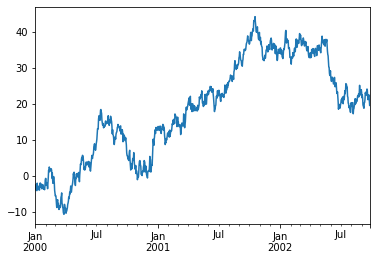

In [160]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

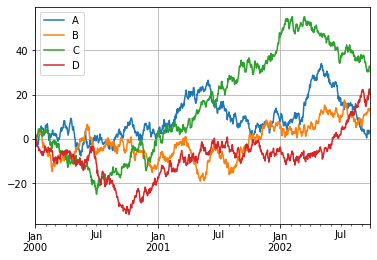

In [165]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
plt.grid()

### 8. 데이터 입/출력

In [162]:
df.to_csv('foo.csv')

In [163]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.353571,-0.474476,0.473053,-0.762977
1,2000-01-02,1.750633,1.252063,1.190949,-0.212096
2,2000-01-03,1.948964,1.029362,1.635125,-1.472872
3,2000-01-04,1.431757,0.399126,-0.434384,-2.137393
4,2000-01-05,3.101640,0.246260,0.135945,-3.498405
...,...,...,...,...,...
995,2002-09-22,6.796192,-41.395372,-15.106262,2.697015
996,2002-09-23,7.327763,-42.972570,-14.420742,0.345887
997,2002-09-24,9.316564,-44.785123,-14.340307,1.127663
998,2002-09-25,8.997117,-45.454543,-15.765460,1.992048


In [164]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')